# Transpad
Example of a canvas showing two histograms with different scales.
The second histogram is drawn in a transparent pad




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:00 AM.</small></i>

In [1]:
TCanvas *c1 = new TCanvas("c1","transparent pad",200,10,700,500);
TPad *pad1 = new TPad("pad1","",0,0,1,1);
TPad *pad2 = new TPad("pad2","",0,0,1,1);
pad2->SetFillStyle(4000); //will be transparent
pad1->Draw();
pad1->cd();

TH1F *h1 = new TH1F("h1","h1",100,-3,3);
TH1F *h2 = new TH1F("h2","h2",100,-3,3);
TRandom r;
for (Int_t i=0;i<100000;i++) {
   Double_t x1 = r.Gaus(-1,0.5);
   Double_t x2 = r.Gaus(1,1.5);
   if (i <1000) h1->Fill(x1);
   h2->Fill(x2);
}
h1->Draw();
pad1->Update(); //this will force the generation of the "stats" box
TPaveStats *ps1 = (TPaveStats*)h1->GetListOfFunctions()->FindObject("stats");
ps1->SetX1NDC(0.4); ps1->SetX2NDC(0.6);
pad1->Modified();
c1->cd();

Compute the pad range with suitable margins

In [2]:
Double_t ymin = 0;
Double_t ymax = 2000;
Double_t dy = (ymax-ymin)/0.8; //10 per cent margins top and bottom
Double_t xmin = -3;
Double_t xmax = 3;
Double_t dx = (xmax-xmin)/0.8; //10 per cent margins left and right
pad2->Range(xmin-0.1*dx,ymin-0.1*dy,xmax+0.1*dx,ymax+0.1*dy);
pad2->Draw();
pad2->cd();
h2->SetLineColor(kRed);
h2->Draw("][sames");
pad2->Update();
TPaveStats *ps2 = (TPaveStats*)h2->GetListOfFunctions()->FindObject("stats");
ps2->SetX1NDC(0.65); ps2->SetX2NDC(0.85);
ps2->SetTextColor(kRed);

Draw axis on the right side of the pad

In [3]:
TGaxis *axis = new TGaxis(xmax,ymin,xmax,ymax,ymin,ymax,50510,"+L");
axis->SetLabelColor(kRed);
axis->Draw();

Draw all canvases 

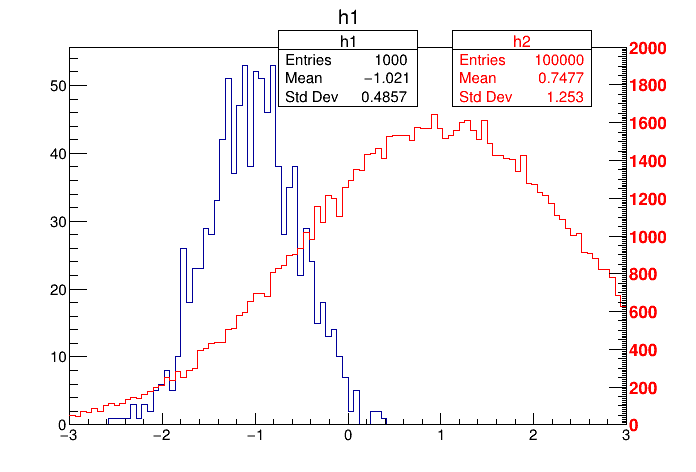

In [4]:
gROOT->GetListOfCanvases()->Draw()